In [1]:
import numpy
from galpy.potential import LogarithmicHaloPotential
from galpy.orbit import Orbit
from galpy.util import bovy_plot, bovy_coords, bovy_conversion
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Initial conditions for $N$-body simulations to create the impact we want

Setup the potential and coordinate system

In [2]:
lp= LogarithmicHaloPotential(normalize=1.,q=0.9)
R0, V0= 8., 220.

Functions for converting coordinates between rectangular to cylindrical:

In [3]:
def rectangular_to_cylindrical(xv):
    R,phi,Z= bovy_coords.rect_to_cyl(xv[:,0],xv[:,1],xv[:,2])
    vR,vT,vZ= bovy_coords.rect_to_cyl_vec(xv[:,3],xv[:,4],xv[:,5],R,phi,Z,cyl=True)
    out= numpy.empty_like(xv)
    # Preferred galpy arrangement of cylindrical coordinates
    out[:,0]= R
    out[:,1]= vR
    out[:,2]= vT
    out[:,3]= Z
    out[:,4]= vZ
    out[:,5]= phi
    return out
def cylindrical_to_rectangular(xv):
    # Using preferred galpy arrangement of cylindrical coordinates
    X,Y,Z= bovy_coords.cyl_to_rect(xv[:,0],xv[:,5],xv[:,3])
    vX,vY,vZ= bovy_coords.cyl_to_rectvec(xv[:,1],xv[:,2],xv[:,4],xv[:,5])
    out= numpy.empty_like(xv)
    out[:,0]= X
    out[:,1]= Y
    out[:,2]= Z
    out[:,3]= vX
    out[:,4]= vY
    out[:,5]= vZ
    return out

At the time of impact, the phase-space coordinates of the GC can be computed using orbit integration:

In [4]:
xv_prog_init= numpy.array([30.,0.,0.,0.,105.74895,105.74895])
RvR_prog_init= rectangular_to_cylindrical(xv_prog_init[:,numpy.newaxis].T)[0,:]
prog_init= Orbit([RvR_prog_init[0]/R0,RvR_prog_init[1]/V0,RvR_prog_init[2]/V0,
                  RvR_prog_init[3]/R0,RvR_prog_init[4]/V0,RvR_prog_init[5]],ro=R0,vo=V0)
times= numpy.linspace(0.,10./bovy_conversion.time_in_Gyr(V0,R0),1001)
prog_init.integrate(times,lp)
xv_prog_impact= [prog_init.x(times[-1])[0],prog_init.y(times[-1])[0],prog_init.z(times[-1]),
                 prog_init.vx(times[-1])[0],prog_init.vy(times[-1])[0],prog_init.vz(times[-1])]

The DM halo at the time of impact is at the following location:

In [5]:
xv_dm_impact= numpy.array([-13.500000,2.840000,-1.840000,6.82200571,132.7700529,149.4174464])
RvR_dm_impact= rectangular_to_cylindrical(xv_dm_impact[:,numpy.newaxis].T)[0,:]
dm_impact= Orbit([RvR_dm_impact[0]/R0,RvR_dm_impact[1]/V0,RvR_dm_impact[2]/V0,
                  RvR_dm_impact[3]/R0,RvR_dm_impact[4]/V0,RvR_dm_impact[5]],ro=R0,vo=V0)
dm_impact= dm_impact.flip()
times= numpy.linspace(0.,10./bovy_conversion.time_in_Gyr(V0,R0),1001)
dm_impact.integrate(times,lp)

The orbits over the past 10 Gyr for both objects are:

(-20.0, 20.0)

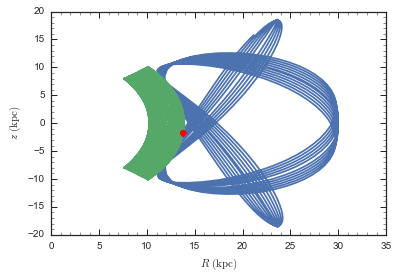

In [6]:
prog_init.plot()
dm_impact.plot(overplot=True)
plot(RvR_dm_impact[0],RvR_dm_impact[3],'ro')
xlim(0.,35.)
ylim(-20.,20.)

## Initial condition for the King cluster

We start the King cluster at 10.25 WD time units, which corresponds to 10.25x0.9777922212082034 Gyr. The phase-space coordinates of the cluster are then:

In [7]:
prog_backward= prog_init.flip()
ts= numpy.linspace(0.,(10.25*0.9777922212082034-10.)/bovy_conversion.time_in_Gyr(V0,R0),1001)
prog_backward.integrate(ts,lp)
print [prog_backward.x(ts[-1])[0],prog_backward.y(ts[-1])[0],prog_backward.z(ts[-1]),
       -prog_backward.vx(ts[-1])[0],-prog_backward.vy(ts[-1])[0],-prog_backward.vz(ts[-1])]

[29.577809361172694, -2.4079802843036058, -2.4053154109323742, 36.904368548683991, 104.25395168642832, 103.9042939586286]


## Initial conditions for the Plummer DM subhalo

## Starting 0.25 time units ago

In [8]:
dm_impact= Orbit([RvR_dm_impact[0]/R0,RvR_dm_impact[1]/V0,RvR_dm_impact[2]/V0,
                  RvR_dm_impact[3]/R0,RvR_dm_impact[4]/V0,RvR_dm_impact[5]],ro=R0,vo=V0)
dm_impact= dm_impact.flip()
ts= numpy.linspace(0.,0.25*0.9777922212082034/bovy_conversion.time_in_Gyr(V0,R0),10001)
dm_impact.integrate(ts,lp)
print [dm_impact.x(ts[-1])[0],dm_impact.y(ts[-1])[0],dm_impact.z(ts[-1]),
       -dm_impact.vx(ts[-1])[0],-dm_impact.vy(ts[-1])[0],-dm_impact.vz(ts[-1])]

[4.8965792014085778, 8.9181416272959186, 10.033551072654888, 149.50458227428786, -97.714578287010966, 21.235006395774576]


## Starting 0.375 time units ago

In [9]:
dm_impact= Orbit([RvR_dm_impact[0]/R0,RvR_dm_impact[1]/V0,RvR_dm_impact[2]/V0,
                  RvR_dm_impact[3]/R0,RvR_dm_impact[4]/V0,RvR_dm_impact[5]],ro=R0,vo=V0)
dm_impact= dm_impact.flip()
ts= numpy.linspace(0.,0.375*0.9777922212082034/bovy_conversion.time_in_Gyr(V0,R0),10001)
dm_impact.integrate(ts,lp)
print [dm_impact.x(ts[-1])[0],dm_impact.y(ts[-1])[0],dm_impact.z(ts[-1]),
       -dm_impact.vx(ts[-1])[0],-dm_impact.vy(ts[-1])[0],-dm_impact.vz(ts[-1])]

[-8.5662119198502609, 0.50120970587644287, -6.4724441270571687, -50.169060756613071, 214.43730878238947, 112.96727941016003]


## Starting 0.50 time units ago

In [10]:
dm_impact= Orbit([RvR_dm_impact[0]/R0,RvR_dm_impact[1]/V0,RvR_dm_impact[2]/V0,
                  RvR_dm_impact[3]/R0,RvR_dm_impact[4]/V0,RvR_dm_impact[5]],ro=R0,vo=V0)
dm_impact= dm_impact.flip()
ts= numpy.linspace(0.,0.50*0.9777922212082034/bovy_conversion.time_in_Gyr(V0,R0),10001)
dm_impact.integrate(ts,lp)
print [dm_impact.x(ts[-1])[0],dm_impact.y(ts[-1])[0],dm_impact.z(ts[-1]),
       -dm_impact.vx(ts[-1])[0],-dm_impact.vy(ts[-1])[0],-dm_impact.vz(ts[-1])]

[7.9948807918667892, -11.344426189362455, 0.9626499711978439, -100.4814119301404, -84.037056563181252, -151.74007155179646]
